## Import Library

In [14]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
from random import shuffle
from tqdm import tqdm, tqdm_notebook

## Load Data From MongoDB

In [13]:
# Load data dari Database MongoDB 
myClient = pymongo.MongoClient("mongodb://localhost:27017")
myDatabase = myClient.iStorage
myCollection = myDatabase.backup_dataset

In [15]:
# 7 kategori artikel berita yang ada di dalam database
categories = ['news', 'bisnis', 'sports', 'entertainment', 'tekno', 'otomotif', 'health']

In [16]:
# Array yang digunakan untuk menampung data berdasarkan kategori
polhukam,bisnis,olahraga,hiburan,teknologi,otomotif,kesehatan = [],[],[],[],[],[],[]

In [17]:
# fungsi ambil data berdasarkan category
def getQuery(category=None):
    iQuery = myCollection.find(
        {"category": "{}".format(category)}, 
        {
            "category": 1, 
            "title": 1,
            "url": 1,
            "cleanContent": 1
        }).limit(15000)
    
    return iQuery

In [18]:
# fungsi input data ke list
def setData(iQuery=None):
    category = []
    for query in iQuery: category.append(query)
        
    return category

In [19]:
iData = []

In [20]:
# Ambil data dari Database dan disimpan di array berdasarkan kategori
####################################
iQuery = getQuery("news")
polhukam = setData(iQuery)
for data in tqdm(polhukam): iData.append(data)
####################################
iQuery = getQuery("bisnis")
bisnis = setData(iQuery)
for data in tqdm(bisnis): iData.append(data)
####################################
iQuery = getQuery("sports")
olahraga = setData(iQuery)
for data in tqdm(olahraga): iData.append(data)
####################################
iQuery = getQuery("entertainment")
hiburan = setData(iQuery)
for data in tqdm(hiburan): iData.append(data)
####################################
iQuery = getQuery("tekno")
teknologi = setData(iQuery)
for data in tqdm(teknologi): iData.append(data)
####################################
iQuery = getQuery("otomotif")
otomotif = setData(iQuery)
for data in tqdm(otomotif): iData.append(data)
####################################
iQuery = getQuery("health")
kesehatan = setData(iQuery)
for data in tqdm(kesehatan): iData.append(data)

100%|██████████| 15000/15000 [00:00<00:00, 3032026.99it/s]


In [21]:
# Dataframe Categories
df = pd.DataFrame({
    'Nama Kategori':[
        'Polhukam','Bisnis','Olahraga','Hiburan','Teknologi','Otomotif','Kesehatan'],
    'Jumlah Data':[
        len(polhukam),
        len(bisnis),
        len(olahraga),
        len(hiburan),
        len(teknologi),
        len(otomotif),
        len(kesehatan)
    ]
})
df.loc['Total'] = pd.Series(df['Jumlah Data'].sum(), index = ['Jumlah Data'])
df

,Nama Kategori,Jumlah Data
0,Polhukam,15000.0
1,Bisnis,15000.0
2,Olahraga,15000.0
3,Hiburan,15000.0
4,Teknologi,13222.0
5,Otomotif,15000.0
6,Kesehatan,15000.0
Total,NaN,103222.0


## Konversi Data ke DataFrame (Pandas)

In [22]:
shuffle(iData)

In [23]:
df = pd.DataFrame(iData)

In [24]:
df.tail()

,_id,category,title,url,cleanContent
103217,5d6e1e036e94dbce0f1b3f11,health,"Jangan Biasakan Sering Begadang, Awas Bahayany...",https://gaya.tempo.co/read/1234340/jangan-bias...,orang begadang alasan kebiasaan insomnia tuntu...
103218,5d6b82c2bc0f642ed07a9f9f,sports,"Manchester United Singkirkan PSG, Suporternya ...",https://bola.tempo.co/read/1183141/manchester-...,keberhasilan manchester united menyingkirkan p...
103219,5d8d113b68775266a9c360e5,entertainment,"Bersama Kakak dan Kekasihnya, Dhawiya Dipindah...",https://entertainment.kompas.com/read/2018/02/...,etelah serangkaian penyidikan polisi memindahk...
103220,5d6fa46d62762003cf1e1b24,bisnis,"Bank Indonesia Tahan Suku Bunga Acuan 4,25 Persen",https://bisnis.tempo.co/read/1081298/bank-indo...,rapat dewan gubernur bank indonesia bi memutus...
103221,5d6ab160165d77c1e75d62ec,news,"Kasus Alih Fungsi Hutan, Polisi Periksa Wagub ...",https://nasional.tempo.co/read/1173138/kasus-a...,penyidik direktorat kriminal khusus polda suma...


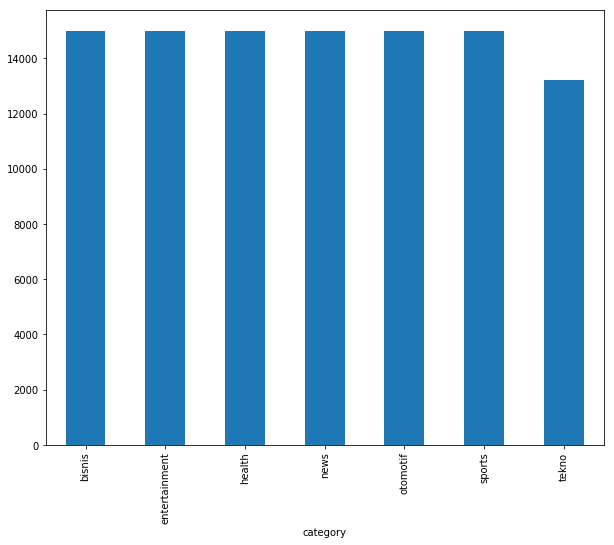

In [25]:
fig = plt.figure(figsize=(10,8))
df.groupby('category').title.count().plot.bar(ylim=0)
plt.show()

## Menggunakan Metode Naive Bayes

In [128]:
import textacy
from sklearn.naive_bayes import MultinomialNB
from textacy.preprocess import preprocess_text
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
# mendefinisikan library ke variabel yang lebih singkat
tfidf = TfidfVectorizer(min_df=1, max_df=0.25)
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

In [80]:
# Membuat data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(df['cleanContent'], df['category'], random_state = 0, test_size = 0.20)

X_train_counts = count_vect.fit_transform(X_train)

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [81]:
X1 = tfidf.fit_transform(X_train)

In [82]:
X_train_tfidf.shape

(84000, 222264)

In [83]:
X1.shape

(84000, 222257)

In [42]:
# Create model MultinomialNB
modelMNB = MultinomialNB()

In [84]:
modelMNB.fit(X1, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [85]:
model = MultinomialNB().fit(X1, y_train)

In [86]:
def get_categoryMNB(text):
    result_cleanText = textacy.preprocess_text(text,lowercase=True,no_urls=True,no_numbers=True,no_punct=True)
    hasil_prediksi = model.predict(tfidf.transform([result_cleanText]))
    return hasil_prediksi

In [87]:
new_title = '''Waspadalah, Stroke Kini Sudah Menyerang Orang Usia 30-an'''

In [88]:
print(get_categoryMNB(new_title))

['health']


In [89]:
# score dari model multinomial naive bayes dari 105000 dataset
print(model.score(X1, y_train))

0.9205238095238095


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [129]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

In [130]:
nb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [131]:
y_pred = nb.predict(X_test)

In [132]:
print("Table Confusion Matrix")
print("=========================\n")
print('Accuracy %s' % accuracy_score(y_pred, y_test))
print('=========================\n')
print(classification_report(y_test, y_pred,target_names=categories))

Table Confusion Matrix

Accuracy 0.9565512230564301

               precision    recall  f1-score   support

         news       0.91      0.97      0.94      2988
       bisnis       0.96      0.97      0.96      2961
       sports       0.96      0.93      0.94      3030
entertainment       0.93      0.97      0.95      3019
        tekno       0.98      0.97      0.98      3014
     otomotif       0.98      0.98      0.98      3022
       health       0.98      0.92      0.95      2611

  avg / total       0.96      0.96      0.96     20645



In [26]:
import textacy
from sklearn.naive_bayes import MultinomialNB
from textacy.preprocess import preprocess_text
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

/home/lumierra/Project-Python/.env/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
tfidf = TfidfVectorizer(min_df=1, max_df=0.25)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df['cleanContent'], df['category'])

In [29]:
X1 = tfidf.fit_transform(X_train)

In [30]:
X1.shape

(77416, 208264)

In [31]:
print('X_traint : {}'.format(len(X_train)))
print('X_test   : {}'.format(len(X_test)))
print('Total    : {}'.format(len(X_train) + len(X_test)))

X_traint : 77416
X_test   : 25806
Total    : 103222


In [32]:
clf = MultinomialNB().fit(X1, y_train)

In [33]:
def get_categoryMNB(text):
    result_cleanText = textacy.preprocess_text(text,lowercase=True,no_urls=True,no_numbers=True,no_punct=True)
    hasil_prediksi = clf.predict(tfidf.transform([result_cleanText]))
    return hasil_prediksi

In [34]:
new_title = '''Arifin Ilham Sakit, Ini 7 Tips Bantuan Saat Kerabat Sakit'''

In [35]:
print(get_categoryMNB(new_title))

['entertainment']


In [36]:
print(clf.score(X1, y_train))

0.9646326340808101


In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
import seaborn as sns; sns.set()

In [38]:
model = make_pipeline(TfidfVectorizer(min_df=1, max_df=0.25), MultinomialNB())

In [39]:
model.fit(X_train, y_train)
labels = model.predict(X_test)

In [43]:
print("Table Confusion Matrix")
print("=========================\n")
print('Accuracy %s' % accuracy_score(labels, y_test))
print('=========================\n')
print(classification_report(y_test, labels,target_names=categories))

Table Confusion Matrix

Accuracy 0.9593117879562892

               precision    recall  f1-score   support

         news       0.92      0.97      0.95      3778
       bisnis       0.96      0.97      0.96      3784
       sports       0.96      0.93      0.95      3768
entertainment       0.94      0.97      0.95      3738
        tekno       0.98      0.97      0.97      3777
     otomotif       0.99      0.97      0.98      3734
       health       0.98      0.92      0.95      3227

  avg / total       0.96      0.96      0.96     25806



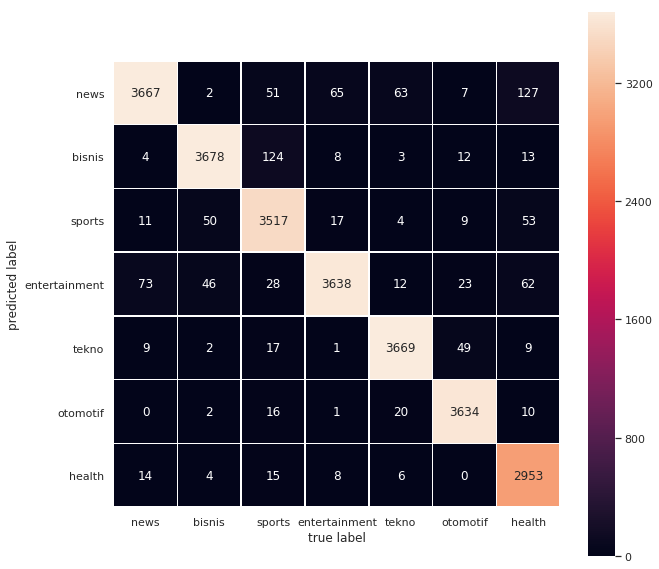

In [40]:
mat = confusion_matrix(y_test, labels)
f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,linewidths=.6, ax=ax,
            xticklabels=categories, yticklabels=categories)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Check Data

In [ ]:
# Load data dari Database MongoDB 
client = pymongo.MongoClient("mongodb://localhost:27017")
database = client.iStorage
collection = database.iData

In [92]:
def insertData(attr=None):
    client = pymongo.MongoClient("mongodb://localhost:27017")
    database = client.iStorage
    collection = database.dataset
    collection.insert_one(attr)
    
#     try:
#         collection.insert(attr)
#         print('Insert Data into MongoDB Successfully')
#     except:
#         print('Insert Data into Mongod Failed')

In [141]:
def getData(category=None):
    client = pymongo.MongoClient("mongodb://localhost:27017")
    database = client.iStorage
    collection = database.dataset
    
    iData = []
    iQuery = collection.find(
        {"category": "{}".format(category)}, 
        {
            "category": 1, 
            "title": 1,
            "url": 1,
            "cleanContent": 1
        })
    
    for query in iQuery: iData.append(query)
        
    return iData

In [70]:
def deleteData(col=None):
    client = pymongo.MongoClient("mongodb://localhost:27017")
    database = client.iStorage
    collection = database["{}".format(col)]
    
    query = collection.remove({})

In [72]:
# Hapus Data di Collection
# deleteData('dataset')

In [87]:
def makeDataset2(category=None):
    data = getData('{}'.format(category))
    benar = 0
    salah = 0
    for d in tqdm(data):
        if data['category'] == get_categoryMNB(data['title']):
            benar+=1
            insertData(data)
        else: salah+=1

    print('=============================')
    print('Benar : {}'.format(benar))
    print('Salah : {}'.format(salah))

In [96]:
makeDataset2('news')

100%|██████████| 140906/140906 [10:21<00:00, 226.57it/s]

Benar : 92263
Salah : 48643


In [142]:
def makeDataset(category=None):
    data = getData('{}'.format(category))
    benar = 0
    salah = 0
    for i in tqdm(range(len(data))[:100]):
        print(data[i]['title'])
        print('Kategori : ' + data[i]['category'])
        print(get_categoryMNB(data[i]['title']))
        if data[i]['category'] == get_categoryMNB(data[i]['cleanContent']): 
            benar+=1
            print('Benar')
#             insertData(data[i])
        else: 
            salah+=1
            print('Salah')
        print('======================================\n')

    print('=============================')
    print('Benar : {}'.format(benar))
    print('Salah : {}'.format(salah))

In [143]:
makeDataset('health')

 15%|█▌        | 15/100 [00:00<00:00, 144.80it/s]

Awal Tahun Baru 2019 Jokowi Jogging, Intip Manfaat Baiknya
Kategori : health
['health']
Benar

Resolusi 2019, Mario Kahitna Akan Kurangi Penggunaan Plastik
Kategori : health
['tekno']
Benar

Rayakan Tahun Baru 2019, Intip Gaya Jimin BTS Sapa Army
Kategori : health
['entertainment']
Salah

Tahun Baru 2019, Intip Foto Keluarga Selebriti Ini
Kategori : health
['health']
Salah

Anak Memiliki Akun Media Sosial Sejak Dini, Ini Kata Psikolog
Kategori : health
['health']
Benar

Libur Tahun Baru, Anda di Rumah Saja? Intip 4 Kegiatan Seru
Kategori : health
['health']
Salah

Tahun Baru Pesta Kembang Api, Sejarahnya untuk Usir Roh Jahat
Kategori : health
['health']
Salah

Tahun 2019 Akan Jadi Tahun Keberuntungan untuk 3 Zodiak Ini
Kategori : health
['tekno']
Benar

Tips Semangat Bekerja Setelah Libur Akhir Tahun
Kategori : health
['health']
Benar

Sandiaga Uno Tak Suka Ikat Pinggang, Ini Penggantinya
Kategori : health
['news']
Benar

Beda Pilihan Brand Fashion antara Kai EXO dan Jennie Blackpink
K

 44%|████▍     | 44/100 [00:00<00:00, 142.61it/s]

Salah

Torro Margens Sempat Muntah Darah saat Syuting, Apa Penyebabnya?
Kategori : health
['health']
Benar

Ini Gejala Infeksi Lambung, Penyakit yang Diderita Torro Margens 
Kategori : health
['health']
Benar

RM Bergaya Rambut Mohawk, Intip 7 Gaya Unik Personel BTS Lainnya 
Kategori : health
['health']
Benar

Aktor Senior Torro Margens Meninggal, Ini 3 Fakta Uniknya
Kategori : health
['entertainment']
Salah

Pelecehan Seksual Pejabat BPJS, Intip Cara Mencegah Hal Serupa
Kategori : health
['health']
Salah

Ricky Cuaca Turun 38 Kilogram Dengan Plank, Ini Caranya
Kategori : health
['tekno']
Benar

Selain jadi Aktor, Torro Margens Pernah Bela Kaum Tergusur
Kategori : health
['entertainment']
Salah

Kembali Sehat, Kenali Virus yang Menyerang Ryeowook  Super Junior
Kategori : health
['health']
Benar

Ini Rahasia Perawatan Rambut Gondrong Steve Aoki
Kategori : health
['health']
Benar

Pria, Mau Tampil Gaya? Jangan Pernah Lakukan Ini
Kategori : health
['health']
Benar

Studi: Semakin Pandai M

 74%|███████▍  | 74/100 [00:00<00:00, 143.01it/s]

Benar

Pengeluaran Pria Inggris untuk Fashion Meningkat
Kategori : health
['health']
Benar

 Putra Mahkota Menikah, Paku Alam X Ciptakan Tarian Khusus
Kategori : health
['entertainment']
Benar

Studi: Gagasan Bisa Muncul Saat Jenuh
Kategori : health
['health']
Benar

Menu Sehat Mahal? Coba Trik Ini
Kategori : health
['health']
Benar

4 Sepatu Basket yang Nyaman versi Mario Lawalata
Kategori : health
['health']
Benar

Ragu Imunisasi? Cek Dulu Faktanya
Kategori : health
['health']
Benar

Adopsi Anjing yang Terbuang, Apa Langkah - Langkahnya?
Kategori : health
['health']
Benar

Beberapa Kesalahan Perawatan yang Sering Dilakukan Pemilik Anjing
Kategori : health
['health']
Benar

Masturbasi untuk Pria Dapat Tingkatkan Imunitas Tubuh, Apa Lagi?
Kategori : health
['health']
Benar

5 Mitos Seputar Sembelit
Kategori : health
['health']
Benar

Detak Jantung Tak Terdeteksi, Bayi ini Selamat Setelah Dilahirkan
Kategori : health
['health']
Benar

Selain Cokelat dan Semangka, Makanan Ini Cegah Disfu

100%|██████████| 100/100 [00:00<00:00, 140.05it/s]

Benar

Tidak Bertenaga, Ciri Metabolisme Tubuh Anda Lambat. Apa Lagi?
Kategori : health
['health']
Benar

Ustad Arifin Ilham Terkena Kanker Getah Bening? Kanker Apa Itu?
Kategori : health
['health']
Benar

Jakarta Sering Hujan, Ini Makanan Terlezat Hangatkan Badan
Kategori : health
['health']
Benar

Makanan Sehat Cegah Kanker Usus Besar
Kategori : health
['health']
Benar

Panti Asuhan Dianggap Mampu Kurangi Gelandangan
Kategori : health
['health']
Salah

Mau Kuliah di Oxford, Intip Tips Ketua Perhimpunan Alumni Oxford
Kategori : health
['health']
Benar

Lima Kiat Mudah Memilih Sepatu Bot, Cek 5 Hal Ini
Kategori : health
['health']
Benar

Akan Ada Boneka BTS, Intip Harganya
Kategori : health
['health']
Salah

4 Kesalahan Kesehatan yang Sering Diabaikan Pria
Kategori : health
['health']
Benar

Arifin Ilham Sakit, Ini 7 Tips Bantuan Saat Kerabat Sakit
Kategori : health
['entertainment']
Benar

Jahe Dapat Turunkan Kolesterol, Cek 4 Manfaat Ampuh Lainnya
Kategori : health
['health']
Benar



## Save Model Naive Bayes MultinomialNB

In [37]:
import pickle

In [50]:
pkl_filename = 'modelMNB.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(modelMNB, file)

In [51]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [54]:
# Calculate the accuracy score and predict target values
score = pickle_model.score(X1, y_train)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X1)

Test score: 91.58 %


In [55]:
def get_categoryMNB(text):
    result_cleanText = textacy.preprocess_text(text,lowercase=True,no_urls=True,no_numbers=True,no_punct=True)
    hasil_prediksi = pickle_model.predict(tfidf.transform([result_cleanText]))
    return hasil_prediksi

In [56]:
title = '''Waspadalah, Stroke Kini Sudah Menyerang Orang Usia 30-an'''

In [59]:
print(get_categoryMNB(title)[0])

health


## Joblib

In [10]:
from sklearn.externals import joblib

In [126]:
joblib.dump(modelMNB, 'model_joblib')

['model_joblib']

In [127]:
mj = joblib.load('model_joblib')

In [128]:
mj.score(X1, y_train)

0.8939410971223022

In [129]:
mj.predict(tfidf.transform([new_title]))

array(['entertainment'], dtype='<U13')

## Testing

In [38]:
import requests
from bs4 import BeautifulSoup

In [39]:
url = '''https://newsapi.org/v2/top-headlines?country=id&apiKey=3bb4bf323f7f43d3aaafb6bd5cd26c92'''

In [40]:
response = requests.get(url).json()

In [41]:
response

{'status': 'ok',
 'totalResults': 38,
 'articles': [{'source': {'id': None, 'name': 'Tempo.co'},
   'author': 'Terjemahan',
   'title': 'Apple Umumkan AirPods Pro, Akan Hadir 30 Oktober - Tempo',
   'description': 'Apple telah membuat mikrofon ke dalam AirPods Pro yang mendeteksi suara eksternal, dan earbud yang kemudian membatalkan suara itu.',
   'url': 'https://tekno.tempo.co/read/1265730/apple-umumkan-airpods-pro-akan-hadir-30-oktober',
   'urlToImage': 'https://statik.tempo.co/data/2019/10/29/id_884783/884783_720.jpg',
   'publishedAt': '2019-10-29T05:58:01Z',
   'content': None},
  {'source': {'id': None, 'name': 'Detik.com'},
   'author': 'Lamhot Aritonang',
   'title': 'Mobil Menteri Baru Jokowi Sudah Mejeng di DPR - Detikcom',
   'description': 'Mobil dinas baru yakni Toyota Crown 2.5 HV G-Executive seharga Rp 1,5 miliar sudah mejeng lho diparkiran gedung DPR hari ini. Yuk, intip penampakannya.',
   'url': 'https://oto.detik.com/oto-galeri/d-4763907/mobil-menteri-baru-jokowi-s

In [42]:
temp = []
for r in response['articles']:
    print(r['source'])
    temp.append(r)

{'id': None, 'name': 'Tempo.co'}
{'id': None, 'name': 'Detik.com'}
{'id': None, 'name': 'Matamata.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Tempo.co'}
{'id': None, 'name': 'Bolasport.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Liputan6.com'}
{'id': None, 'name': 'Cnnindonesia.com'}
{'id': None, 'name': 'Kumparan.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Detik.com'}
{'id': None, 'name': 'Mojok.co'}
{'id': None, 'name': 'Tempo.co'}
{'id': None, 'name': 'Detik.com'}
{'id': None, 'name': 'Tempo.co'}
{'id': None, 'name': 'Suara.com'}
{'id': None, 'name': 'Tribunnews.com'}
{'id': None, 'name': 'Ayobandung.com'}
{'id': None, 'name': 'Kompas.com'}


In [43]:
temp

[{'source': {'id': None, 'name': 'Tempo.co'},
  'author': 'Terjemahan',
  'title': 'Apple Umumkan AirPods Pro, Akan Hadir 30 Oktober - Tempo',
  'description': 'Apple telah membuat mikrofon ke dalam AirPods Pro yang mendeteksi suara eksternal, dan earbud yang kemudian membatalkan suara itu.',
  'url': 'https://tekno.tempo.co/read/1265730/apple-umumkan-airpods-pro-akan-hadir-30-oktober',
  'urlToImage': 'https://statik.tempo.co/data/2019/10/29/id_884783/884783_720.jpg',
  'publishedAt': '2019-10-29T05:58:01Z',
  'content': None},
 {'source': {'id': None, 'name': 'Detik.com'},
  'author': 'Lamhot Aritonang',
  'title': 'Mobil Menteri Baru Jokowi Sudah Mejeng di DPR - Detikcom',
  'description': 'Mobil dinas baru yakni Toyota Crown 2.5 HV G-Executive seharga Rp 1,5 miliar sudah mejeng lho diparkiran gedung DPR hari ini. Yuk, intip penampakannya.',
  'url': 'https://oto.detik.com/oto-galeri/d-4763907/mobil-menteri-baru-jokowi-sudah-mejeng-di-dpr',
  'urlToImage': 'https://awsimages.detik.n

In [44]:
for t in temp:
    print(t['title'])
    print(t['url'])
    print('=========================\n')
    print(get_categoryMNB(t['title']))
    print('=========================\n')

Apple Umumkan AirPods Pro, Akan Hadir 30 Oktober - Tempo
https://tekno.tempo.co/read/1265730/apple-umumkan-airpods-pro-akan-hadir-30-oktober

['tekno']

Mobil Menteri Baru Jokowi Sudah Mejeng di DPR - Detikcom
https://oto.detik.com/oto-galeri/d-4763907/mobil-menteri-baru-jokowi-sudah-mejeng-di-dpr

['news']

Resmi Tunangan, Ternyata Rezky Aditya Incar Citra Kirana Sejak SMA - MataMata.com - matamata.com
https://www.matamata.com/seleb/2019/10/29/124134/resmi-tunangan-ternyata-rezky-aditya-incar-citra-kirana-sejak-sma

['entertainment']

Chevrolet Hengkang, Ini Kata Komunitas Soal Mobil yang Dijual - KOMPAS.com
https://otomotif.kompas.com/read/2019/10/29/123518315/chevrolet-hengkang-ini-kata-komunitas-soal-mobil-yang-dijual

['otomotif']

Wortel Bisa Bantu Turunkan Berat Badan, Cek 8 Manfaat Lainnya - Tempo
https://cantik.tempo.co/read/1265701/wortel-bisa-bantu-turunkan-berat-badan-cek-8-manfaat-lainnya

['health']

Tidak Ada yang Tanya, Jack Miller Sindir Jorge Lorenzo di Jumpa Pers - B

## Testing

In [80]:
client = pymongo.MongoClient("mongodb://localhost:27017")
database = myClient.iStorage
collection = myDatabase.iBefore

In [81]:
iQuery = collection.find({})

In [82]:
data = []
for q in iQuery: data.append(q)

In [87]:
for d in data:
    print(d['title'])
    print(d['url'])
    print('=========================\n')
    print(get_categoryMNB(d['title']))
    print('=========================\n')

Bank Mandiri Catat Laba Rp 20,3 T, Tumbuh 11,9 Persen
https://bisnis.tempo.co/read/1265518/bank-mandiri-catat-laba-rp-203-t-tumbuh-119-persen

['bisnis']

Senja di Kaimana, Masih Seelok Dahulu
https://travel.tempo.co/read/1265515/senja-di-kaimana-masih-seelok-dahulu

['entertainment']

Uni Eropa Setuju Penundaan Brexit, Apa Syaratnya?
https://dunia.tempo.co/read/1265473/uni-eropa-setuju-penundaan-brexit-apa-syaratnya

['bisnis']

Menpan RB Tjahjo Kumolo: Pendaftaran CPNS 2019 Dibuka 11 November
https://bisnis.tempo.co/read/1265493/menpan-rb-tjahjo-kumolo-pendaftaran-cpns-2019-dibuka-11-november

['bisnis']

Waspadalah, Stroke Kini Sudah Menyerang Orang Usia 30-an
https://gaya.tempo.co/read/1265506/waspadalah-stroke-kini-sudah-menyerang-orang-usia-30-an

['health']

Bali Macet, Jerinx SID Salahkan Pemerintah
https://seleb.tempo.co/read/1265507/bali-macet-jerinx-sid-salahkan-pemerintah

['entertainment']

